In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.size

209874

In [5]:
furniture_df = df[df['Category']=='Furniture']

In [6]:
furniture_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [7]:
cols = ['Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Segment','Country','City','State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

In [8]:
furniture_df.drop(cols, axis=1,inplace=True)

C:\Users\Chloris.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [9]:
furniture_df = furniture_df.set_index('Row ID')

In [10]:
furniture_df.head(5)

,Order Date,Sales
Row ID,,
1,2016-11-08,261.9600
2,2016-11-08,731.9400
4,2015-10-11,957.5775
6,2014-06-09,48.8600
11,2014-06-09,1706.1840


In [11]:
furniture_df['Order Date'] = pd.to_datetime(furniture_df['Order Date'])

In [12]:
furniture_df = furniture_df.sort_values('Order Date')

In [13]:
furniture_df['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [14]:
furniture_df['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [15]:
furniture_df.head()

,Order Date,Sales
Row ID,,
7475,2014-01-06,2573.820
7661,2014-01-07,76.728
867,2014-01-10,51.940
717,2014-01-11,9.940
2979,2014-01-13,545.940


In [16]:
furniture = furniture_df.groupby('Order Date')['Sales'].sum().reset_index()

In [17]:
furniture.sort_values('Sales', ascending=False)

,Order Date,Sales
326,2015-09-17,10006.1740
626,2016-12-25,6636.8630
377,2015-12-01,6600.6800
802,2017-09-20,5496.1740
171,2014-11-17,5270.0800
358,2015-11-08,5252.4260
775,2017-08-17,4970.1140
185,2014-12-12,4695.6005
861,2017-11-28,4659.1400
180,2014-12-01,4513.6060


In [18]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [19]:
furniture = furniture.set_index('Order Date')

In [20]:
furniture = furniture['Sales'].resample('MS').mean()

In [21]:
furniture.index

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [23]:
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

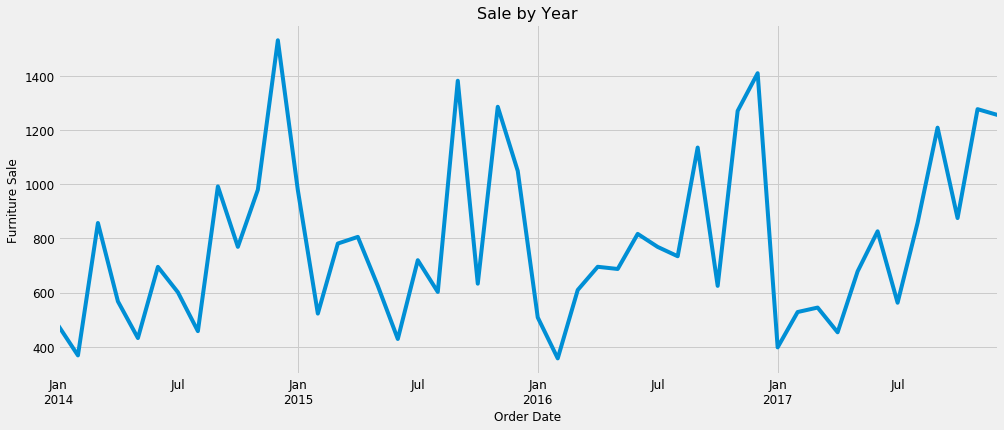

In [24]:
furniture.plot(figsize=(15,6))
plt.ylabel('Furniture Sale', fontsize=12)
plt.xlabel('Order Date', fontsize=12)
plt.title('Sale by Year', fontsize=16)
plt.show()

In [25]:
#Exploring Trend by Removing Seasonality through Moving Average

Text(0.5, 1.0, 'Furniture Rolling Sales')

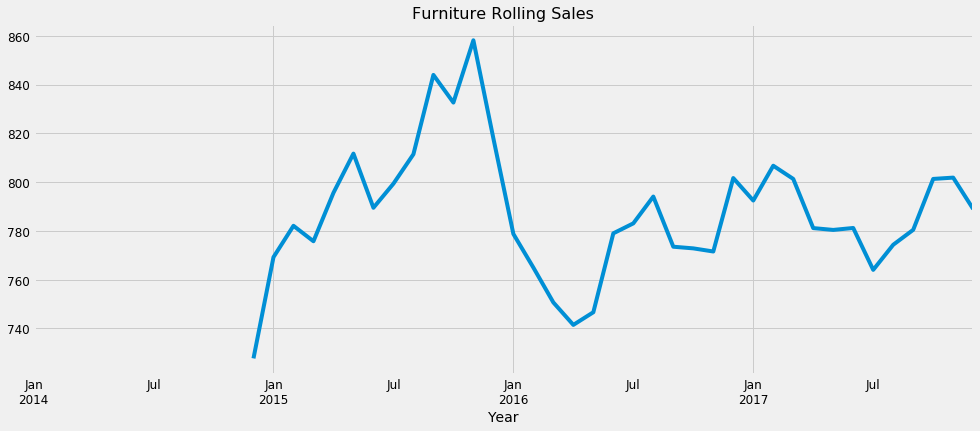

In [26]:
furniture.rolling(12).mean().plot(figsize=(15,6))
plt.xlabel('Year', fontsize=14)
plt.title('Furniture Rolling Sales', fontsize=16)

In [27]:
#Exploring Seasonality by removing trend through Differencing

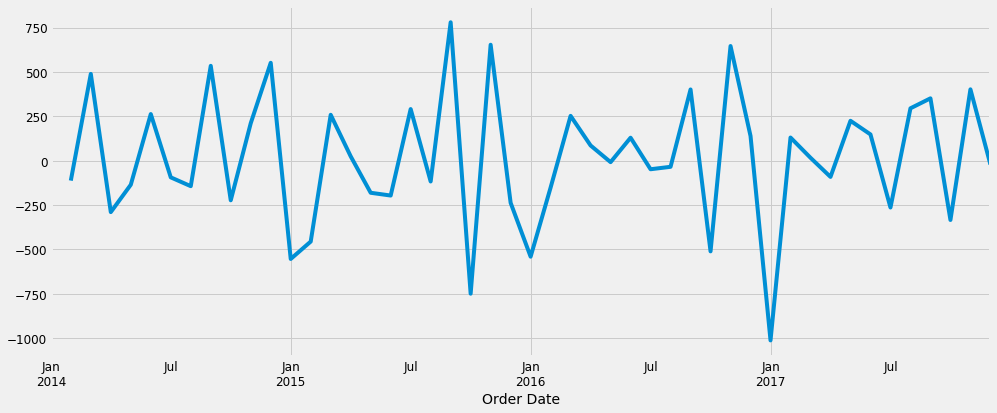

In [28]:
furniture.diff(1).plot(figsize=(15,6))
plt.show()

In [29]:
#Exploring Autocorrelation 

In [30]:
furniture_df = furniture.reset_index()

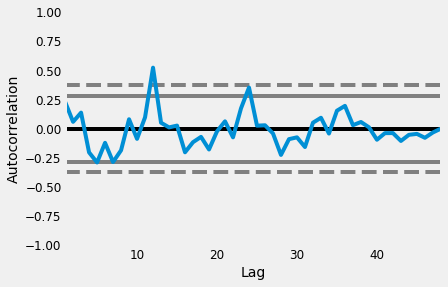

In [31]:
pd.plotting.autocorrelation_plot(furniture)

In [32]:
#Time Series Decomposition Plot

In [33]:
from pylab import rcParams

In [34]:
rcParams['figure.figsize'] = 18, 8

In [35]:
import statsmodels.api as sm

In [36]:
decomposition = sm.tsa.seasonal_decompose(furniture, model='additive')

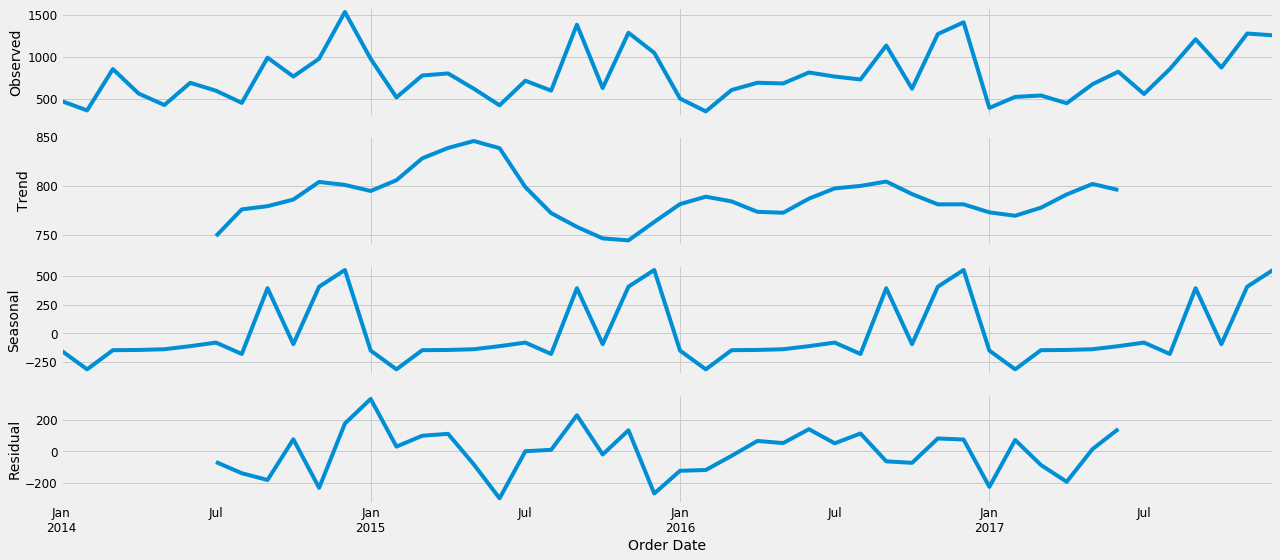

In [37]:
fig = decomposition.plot()
plt.show()

In [38]:
#TIME SERIES FORCASTING WITH SARIMA

In [39]:
import itertools

In [40]:
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [41]:
trial_model = SARIMAX(
                                            furniture,
                                            order=(1,1,1),
                                            seasonal_order=(1,1,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = trial_model.fit()
print(results.aic)

297.7875439553055


In [42]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


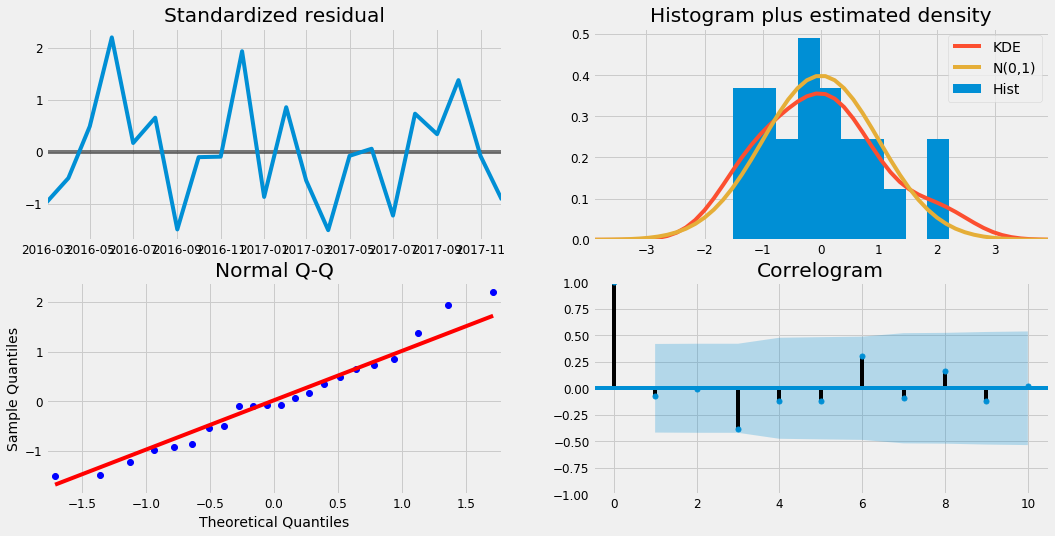

In [43]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [44]:
pred= results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)

In [45]:
pred_1= results.predict(start=pd.to_datetime('2017-01-01'), dynamic=False)

In [46]:
pred_2 = results.get_forecast(steps=10)

C:\Users\Chloris.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


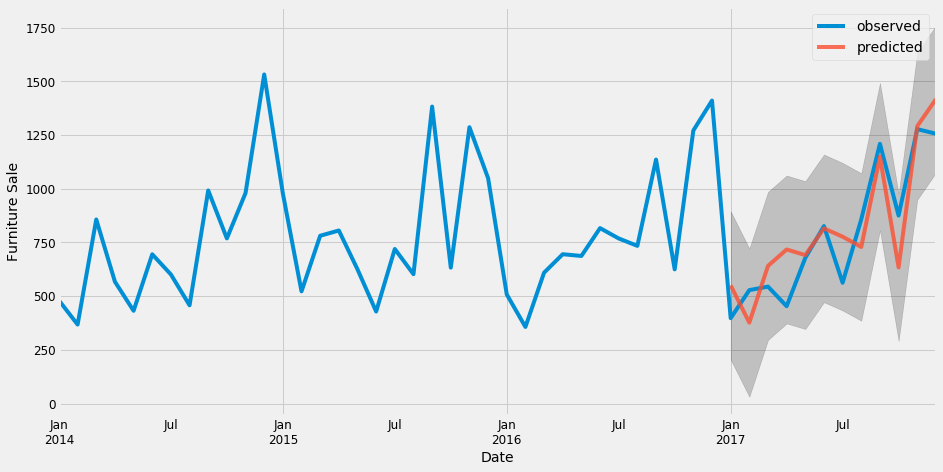

In [87]:
pred_ci = pred.conf_int()

ax = furniture['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='predicted', figsize=(14,7), alpha=0.8)

ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               alpha=0.2,
               color='k')


ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sale')

plt.legend()
plt.show()

In [96]:
pred.predicted_mean

Order Date
2017-01-01     550.097508
2017-02-01     376.885904
2017-03-01     640.883952
2017-04-01     717.477893
2017-05-01     691.390255
2017-06-01     815.731465
2017-07-01     776.952238
2017-08-01     729.181939
2017-09-01    1149.878805
2017-10-01     633.943071
2017-11-01    1291.341635
2017-12-01    1417.169001
Freq: MS, dtype: float64

In [48]:
y_true=furniture['2017':]
y_predicted= pred.predicted_mean
mean_square_error = ((y_predicted - y_true)**2).mean()

In [49]:
print('mean square error is {}'.format(mean_square_error))

mean square error is 22993.57843213686


In [50]:
rmse = round(np.sqrt(mean_square_error),2)
print('root mean square error is {}'.format(rmse))

root mean square error is 151.64


In [51]:
#SARIMA USING GRID SEARCH

In [150]:
from sklearn.metrics import mean_squared_error as msee

In [197]:
#one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder = config
    model = SARIMAX(history, order=order, seasonal_order=sorder, enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    yhat = model_fit.predict(len(history), len(history))
    
    return yhat[0]

In [198]:
def measure_rmse(actual, predicted):
    return sqrt(msee(actual, predicted))

In [199]:
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

In [200]:
#walk forward validation: split data into train and test, predict from train and compare to test
def walk_forward_validation(data, n_test, config):
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    prediction = []
    for i in range(len(test)):
        predict = sarima_forecast(history, config)
        prediction.append(predict)
        history.append(test[i])
    error = measure_rmse(test, prediction)
    key=str(config)
    return (key,error)

In [201]:
def grid_search(data, config_list, n_test):
    scores = [walk_forward_validation(data, n_test, config) for config in config_list]
    scores = [score for score in scores if score[1] !=None]
    scores.sort(key=lambda tup:tup[1])
    return scores

In [202]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in pdq]

models=[]
for order in pdq:
    for sorder in seasonal_pdq:
        models.append((order, sorder))

In [203]:
models[0]

((0, 0, 0), (0, 0, 0, 1))

In [204]:
sarima_config_list = models
scores = grid_search(furniture,sarima_config_list, 10)

C:\Users\Chloris.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Chloris.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\Chloris.Yu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\statespace\represe

In [212]:
min_score = scores[10][1]
min_score

232.15095452616634

In [213]:
for score in scores:
    if score[1] < min_score:
        min_score = score[1]
min_score

222.06403813706805

In [216]:
min_config = []
for score in scores:
    if score[1] <= min_score:
        min_config.append(score[0])
        

In [217]:
min_config

['((1, 1, 1), (1, 1, 0, 1))']